Detecção de valores anômalos
============================



In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('penguins')
dfcopia = df.copy()
dfcopia = dfcopia.dropna(axis=0)
especies = dfcopia['species'].unique()
print(especies)

dfcopia['specie numerica'] = 0

i = 0
for pinguin in dfcopia['species']:
    #print(pinguin)
    if pinguin == 'Adelie':
        dfcopia['specie numerica'].iloc[i] = 1
        i += 1
    elif pinguin == 'Chinstrap':
        dfcopia['specie numerica'].iloc[i] = 2
        i += 1
    elif pinguin == 'Gentoo':
        dfcopia['specie numerica'].iloc[i] = 3
        i += 1
    #print(dfcopia['species'].iloc[i-1],dfcopia['specie numerica'].iloc[i-1])

features_numericos = ["bill_length_mm","bill_depth_mm", "flipper_length_mm", "body_mass_g"]
df_numericos = dfcopia[features_numericos]

['Adelie' 'Chinstrap' 'Gentoo']


c:\venv\ilumpy\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [3]:
sc = StandardScaler()
sc.fit(df_numericos)
X_norm = sc.transform(df_numericos)

In [4]:
FEATURES = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
TARGET = ["specie numerica"]

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #Definindo o normalizador
X_norm = scaler.fit_transform(dfcopia[FEATURES].values) #Normalizando

Normalizamos os dados a fim de realizarmos os PCA.

In [6]:
df_norm = pd.DataFrame(X_norm,columns = FEATURES) #Criando o DataFrame a partir com dados normalizados, que é um array de numpy
df_norm = pd.concat([df_norm,pd.Series(dfcopia['specie numerica']).reset_index(drop=True)],axis=1) #Concatenando a coluna 'price' ao DataFrame

In [7]:
#from sklearn.decomposition import PCA
import numpy as np

X = df_norm[FEATURES] #Definindo o X como as features
y = df_norm['specie numerica']  #Definindo o y como o target

In [8]:
import numpy as np

SEMENTE_ALEATORIA = 6144
N_EXEMPLOS = 300
N_FEATURES = 3
FRACAO_OUTLIERS = 0.10

n_outliers = int(FRACAO_OUTLIERS * N_EXEMPLOS)
n_inliers = N_EXEMPLOS - n_outliers

rng = np.random.RandomState(SEMENTE_ALEATORIA)

In [9]:
data= df_norm
data.head(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,specie numerica
0,0.254545,0.666667,0.152542,1
1,0.269091,0.511905,0.237288,1


In [10]:
X=data.iloc[:, :-1]
y=data.iloc[:, -1]

In [11]:
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

clf = LocalOutlierFactor(n_neighbors=10, contamination=0.1)

y_pred = clf.fit_predict(X_pca)
n_errors = (y_pred != y).sum()
X_scores = clf.negative_outlier_factor_

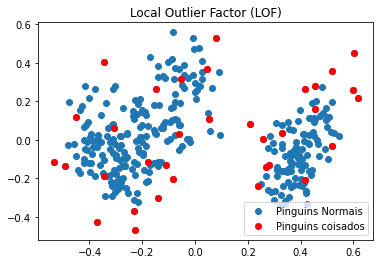

In [12]:
lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_pca[:,0], X_pca[:,1], label="Pinguins Normais")
plt.scatter(values[:,0],values[:,1], color='r', label="Pinguins coisados")
plt.legend(loc="lower right")
plt.show()

## Algoritmo Local Outlier Factor (LOF)



O Local Outlier Factor (LOF) é um algoritmo de detecção de outliers que utiliza a distância entre os pontos para realizar a sua detecção.

Este algoritmo usa o conceito dos $k$ vizinhos mais próximos que vimos no algoritmo de aprendizado supervisionado $k$​-NN. Primeiramente definimos o conjunto $N_k(A)$ que contém todos os $k$ vizinhos do exemplo $A$. Note que pelo motivo de poder haver empate entre as distâncias, o conjunto $N_k(A)$ pode ter mais que $k$ itens.

Tendo o conjunto $N_k(A)$, definimos a distância $k\textrm{-dist}(A)$ como sendo a distância entre o exemplo $A$ e seu vizinho $k$. Em outras palavras, a distância $k\textrm{-dist}(A)$ é a maior distância entre $A$ e os elementos do conjunto $N_k(A)$.

Definimos em seguida a distância de alcançabilidade (*reachability distance*) como sendo:

$$
\textrm{reachability-dist}_k(A,B)=\max \{ k\textrm{-dist}(B), \textrm{dist}(A,B)\}
$$

Na equação acima, $\textrm{dist}(A,B)$ é a distância entre $A$ e $B$.

A distância de alcançabilidade entre $A$ e $B$ será então a própria distância entre $A$ e $B$ <u>ou</u> no mínimo a distância entre $B$ e seu $k$ vizinho. Esta distância representa &ldquo;o quão difícil&rdquo; é chegar em $A$ a partir de $B$. Quanto maior essa distância, mais distante $A$ está de $B$ neste contexto.

Seguimos definindo a distância de alcançabilidade local (*local reachability density*) como sendo:

$$
\textrm{lrd}_k(A) = \left[ \frac{\sum_{B \in N_k(A)}  \textrm{reachability-dist}_k(A,B)}{|N_k(A)|} \right]^{-1}
$$

Essa distância de alcançabilidade representa &ldquo;o quão fácil em média&rdquo; é chegar em $A$ sendo um dos vizinhos de $A$. A equação acima está elevada a $-1$ pois queremos que valores pequenos representem que é &ldquo;fácil&rdquo; chegar em $A$ e valores grandes representem que é &ldquo;difícil&rdquo; chegar em $A$.

Finalmente, após todas essas definições conseguimos definir o Fator de Discrepância Local de $A$, que é seu LOF:

$$
\textrm{LOF}_A = \frac{\sum_{B \in N_k(A)}  \frac{\textrm{lrd}_k(B)}{\textrm{lrd}_k(A)}}{|N_k(A)|}
$$

O valor de $\textrm{LOF}_A$ nos dá pistas sobre a região onde o exemplo $A$ se encontra:

-   Se o valor de $\textrm{LOF}_A$ é próximo de 1: então $A$ está em uma região de densidade de pontos *similar* aos seus vizinhos;
-   Se o valor de $\textrm{LOF}_A$ é maior de 1: então $A$ está em uma região de densidade de pontos *menor* que seus vizinhos;
-   Se o valor de $\textrm{LOF}_A$ é menor de 1: então $A$ está em uma região de densidade de pontos *maior* que seus vizinhos.

Infelizmente não temos (ainda) vídeos do StatQuest sobre detecção de valores anômalos&#x2026; mas temos este excelente [vídeo](https://www.youtube.com/watch?v=Xl7XVPyvO5U) do canal MachineLearningInterview e a [página da Wikipédia](https://en.wikipedia.org/wiki/Local_outlier_factor) em inglês (que descreve o algoritmo de forma muito clara).

O código abaixo mostra como detectar outliers utilizando a implementação do LOF do `scikit-learn`. Primeiramente criamos o modelo. Veja que devemos passar o valor do número de vizinhos que serão considerados ao criar o modelo (é o argumento `n_neighbors`). Aqui escolhemos 35. O valor padrão do `scikin-learn` é 20. Não tem como dizer o melhor valor para seu conjunto de dados, cada caso é um caso.

Outro parâmetro que passamos é a fração de outliers que esperamos ter no nosso conjunto de dados (é o argumento `contamination`). Aqui temos dados sintéticos e sabemos a fração de outliers. Caso não saiba você deverá dar um palpite ou usar o valor `"auto"` para este argumento e deixar que o algoritmo encontre esse valor para você (pode não ser o ideal!). Outros hiperparâmetros podem ser conferidos na [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html) do `scikit-learn`.



In [28]:
from sklearn.neighbors import LocalOutlierFactor

N_VIZINHOS = 35 
# definimos o número de vizinhos a serem consultados

# aqui que criamos o modelo de Local Outlier Factor
# o qual irá consultar o número de vizinhos e a porcentagem de 
# dados que serão considerados como contaminados
modelo_lof = LocalOutlierFactor(
    n_neighbors=N_VIZINHOS,
    contamination=FRACAO_OUTLIERS,
)

O código abaixo mostra como fazemos para detectar os outliers nos conjuntos de dados que geramos. Observe principalmente a linha onde chamamos o método `fit_predict`. Não é apenas `fit` como estávamos acostumados!



In [29]:
CORES = np.array(["red", "blue"])

for n, df_norm in enumerate(df_norm):

    # Ajustamos o modelo aos dados e realizamos a previsão
    modelo_lof.fit(df_norm)
    previsao = modelo_lof.fit_predict(df_norm)

    fig, eixo = plt.subplots(figsize=(5, 5)) # determinamos o tamanho do gráfico que será plotado

    eixo.scatter(
        df_norm[:, 0],
        df_norm[:, 1],
        marker=".",
        s=4,
        color=CORES[(previsao + 1) // 2], # agora determinamos a cor dos pontos correspondentes às anomalias e aos
                                          # pontos "normais"
    )

    eixo.set_xlim(-8, 8)
    eixo.set_ylim(-8, 8)
    eixo.set_xticks(())
    eixo.set_yticks(())
    eixo.set_title(f"Dataset {n}", fontsize=10)

    plt.show()

ValueError: Expected 2D array, got scalar array instead:
array=b.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Podemos visualizar o $\textrm{LOF}$ de cada exemplo usando círculos! O código abaixo é o mesmo do anterior, porém com a parte que plota os os círculos de tamanho proporcional ao $\textrm{LOF}$. Veja que quanto maior o $\textrm{LOF}$ maior a chance do exemplo ser considerado um outlier.



In [ ]:
modelo_lof = LocalOutlierFactor(
    n_neighbors=N_VIZINHOS,
    contamination=FRACAO_OUTLIERS,
)

for n, data_x in enumerate(datasets):

    modelo_lof.fit(data_x)
    previsao = modelo_lof.fit_predict(data_x)

    fig, eixo = plt.subplots(figsize=(5, 5))

    eixo.scatter(
        data_x[:, 0],
        data_x[:, 1],
        marker=".",
        s=4,
        color=CORES[(previsao + 1) // 2],
    )

    # plota os círculos!
    # assim como mencionado na aula, os círculos servem para mostrar a "magnitude" de um outlier 
    # ou seja, quanto maior o círculo, maior a discrepância dele perante os dados "normais"
    X_lof = modelo_lof.negative_outlier_factor_
    raios = (X_lof.max() - X_lof) / (X_lof.max() - X_lof.min())
    eixo.scatter(
        data_x[:, 0],
        data_x[:, 1],
        s=1000 * raios,
        edgecolors=CORES[(previsao + 1) // 2],
        facecolors="none",
    )

    eixo.set_xlim(-8, 8)
    eixo.set_ylim(-8, 8)
    eixo.set_xticks(())
    eixo.set_yticks(())
    eixo.set_title(f"Dataset {n}", fontsize=10)

    plt.show()

Os códigos desta seção foram baseados [neste código](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html) e [neste código](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html) da documentação do `scikit-learn`.



## Algoritmo Isolation Forest (IF)



O Isolation Forest (IF) é um algoritmo de detecção de valores anômalos que utiliza uma floresta de árvores de decisão para realizar a sua detecção.

Este algoritmo usa conceitos do algoritmo de floresta aleatória que vimos durante o bloco de aprendizado supervisionado. A ideia por trás deste algoritmo é que <u>valores anômalos são mais fáceis de serem isolados utilizando árvores de decisão do que valores que não são anômalos</u>.

Vamos começar do início, antes de pensar em uma floresta de árvores de decisão, vamos pensar em apenas uma árvore de decisão e depois expandimos esse conceito para uma floresta.

Diferentemente de uma árvore de decisão de um modelo supervisionado de aprendizado de máquina (onde nosso objetivo era prever um target), aqui nosso objetivo é criar uma árvore de decisão que *isola* todos os pontos do nosso conjunto de dados. <u>*Isolar os pontos* significa que cada vértice folha da nossa árvore contém apenas um exemplo do nosso dataset OU apenas exemplos *iguais* do nosso dataset OU zero exemplos</u>. Quando essa condição for atingida, nós terminamos de construir nossa árvore de decisão! 🎉 Vamos chamar essa árvore de *árvore de isolação*.

Você certamente se recorda que em cada vértice de decisão ou vértice raiz de uma árvore de decisão nós temos um condicional. Em uma árvore de decisão supervisionada, este condicional tem o objetivo de reduzir a impureza dos dados. Vale a pena rever o vídeo do [StatQuest](https://www.youtube.com/watch?v=_L39rN6gz7Y) sobre árvores de decisão se você não se recorda do conceito de impureza.

Em uma árvore de isolação, nós construímos os condicionais dos vértices raiz e de decisão de maneira diferente: selecionamos um atributo de forma aleatória e, após isso, selecionamos um valor de corte aleatório para separar os dados. Se, por exemplo, você tem um conjunto de dados com peso, altura e idade como atributos, então sua árvore de isolação irá escolher um desses atributos de maneira aleatória. Digamos que escolheu o atributo idade. Depois disso, sua árvore de isolação irá escolher um valor de corte aleatório. Digamos que este valor aleatório escolhido foi 27. Desta forma, este vértice que acabamos de criar terá um condicional que checa se a idade é maior que 27 anos e separa os dados em dois vértices seguintes. Este processo é repetido até que a condição de parada (linha sublinhada acima) for atingida.

Como o algoritmo se chama floresta de isolação e não árvore de isolação, você pode imaginar que esse processo de criação de árvores de isolação é repetido uma certa quantidade de vezes criando um comitê (ensemble) de árvores.

Vamos visualizar! Na imagem abaixo nós temos um conjunto de dados sintético com dois atributos. Veja que conseguimos isolar o exemplo $x_j$ usando 4 cortes no conjunto de dados. Cada um desses cortes representa um condicional que foi visitado na árvore de isolação (cada condicional corta o espaço amostral em duas regiões de forma perpendicular à uma das coordenadas).

![img](https://upload.wikimedia.org/wikipedia/commons/f/ff/Isolating_an_Anomalous_Point.png)

Já na imagem abaixo nós temos que para isolar o exemplo $x_i$ nós precisamos de 13 cortes no conjunto de dados (isto é, precisamos visitar 13 condicionais da nossa árvore de isolação).

![img](https://upload.wikimedia.org/wikipedia/commons/c/ce/Isolating_a_Non-Anomalous_Point.png)

Qual desses dois exemplos ($x_j$ ou $x_i$) você acha que tem maior probabilidade de ser um valor anômalo? É o $x_j$, pois este é o mais fácil de ser isolado!

Antes de seguir em frente na matemática que usaremos para definir o que é ou não um valor anômalo usando a floresta de isolação, vale a pena checar o excelente [vídeo](https://www.youtube.com/watch?v=cRzeotaFDwk) do MachineLearningInterview. Infelizmente não temos ainda vídeos sobre detecção de valores anômalos do StatQuest&#x2026;

O primeiro passo para estimar se um certo exemplo $x$ é um valor anômalo ou não consiste em computar a profundidade média para isolar $x$ considerando todas as árvores na nossa floresta de isolação. Essa profundidade é computada justamente passando o exemplo $x$ em cada uma das árvores, anotando a profundidade em uma lista e, no final, tirando a média desses valores. Estatisticamente, esse valor é a esperança da profundidade $h$ do exemplo $x$, logo é representado por $E[h(x)]$.

Agora precisamos computar a profundidade média $c$ para isolar *qualquer* exemplo pertencente ao nosso conjunto de dados. Para isso podemos calcular a esperança da profundidade de *todos* os exemplos do nosso conjunto de dados e tirar a média destes valores. Existe uma forma de estimar esse valor $c$ usando a consideração que nossas árvores de isolação são [árvores binárias de busca](https://en.wikipedia.org/wiki/Binary_search_tree). Sabendo que $\gamma=0.5772156649$ (constante de Euler-Mascheroni) o valor de $c$ para um conjunto árvores induzidas a partir de um conjunto de dados de tamanho $n>2$ pode ser estimado por:

$$
c(n)=2\left[\ln(n-1) + \gamma-\frac{(n-1)}{n}\right]
$$

Finalmente, tento em mãos $E[h(x)]$ e $c(n)$, podemos calcular uma nota $s$ para nosso exemplo $x$ da seguinte maneira:

$$
s(x,n)=2^{-\frac{E[h(x)]}{c(n)}}
$$

Tendo o valor de $s$ nós podemos fazer inferências:

-   Se $s$ é perto de 1, então $x$ é muito provavelmente um valor anômalo;
-   Se $s$ é menor que 0,5, então $x$ muito provavelmente não é um valor anômalo;
-   Se $s$ é menor que 1 e maior que 0,5 é necessário definir um valor de corte até onde aceitamos considerar $x$ um valor anômalo;
-   Se todos os valores $s$ são próximos de 0,5, então é seguro assumir que não existem valores anômalos no conjunto de dados.

Muito bem, agora que sabemos a matemática por trás do algoritmo, vamos ver como usá-lo em Python. Usaremos a classe `IsolationForest` do `scikit-learn`. Como sempre, é bom checar a [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html).

Primeiramente criamos o modelo. Novamente estamos passando a fração de outliers para o hiperparâmetro `contamination`. Se não souber ou quiser computar isso automaticamente, basta eliminar essa linha ou passar o valor `"auto"` para esse hiperparâmetro.



In [ ]:
from sklearn.ensemble import IsolationForest

CORES = np.array(["red", "blue"])
COM_BORDA_DE_PREVISAO = False # mude para True para ver a borda de previsão

# aqui que criamos o modelo de Isolation Forest
modelo_if = IsolationForest(
    contamination=FRACAO_OUTLIERS,
    random_state=SEMENTE_ALEATORIA,
)

Agora treinamos o modelo usando o método `fit` e realizamos a previsão com o método `predict`. Como o modelo de floresta de isolação tem o método `predict` ele pode ser utilizado tanto para detecção de outliers quanto para detecção de novidade!



In [ ]:
for n, data_x in enumerate(datasets):

    # Ajustamos o modelo aos dados e realizamos a previsão
    modelo_if.fit(data_x)
    previsao = modelo_if.predict(data_x)

    fig, eixo = plt.subplots(figsize=(5, 5))

    eixo.scatter(
        data_x[:, 0],
        data_x[:, 1],
        s=4,
        color=CORES[(previsao + 1) // 2],
    )

    eixo.set_xlim(-8, 8)
    eixo.set_ylim(-8, 8)
    eixo.set_xticks(())
    eixo.set_yticks(())
    eixo.set_title(f"Dataset {n}", fontsize=10)

    # plota a borda entre as regiões de outlier/inlier
    if COM_BORDA_DE_PREVISAO:
        xx, yy = np.meshgrid(
            np.linspace(-8, 8, 150),
            np.linspace(-8, 8, 150),
        )
        Z = modelo_if.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        eixo.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

    plt.show()

O código desta seção foi baseado [neste código](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html) da documentação do `scikit-learn`.



## Testando com o dataset de diamantes



Vamos testar o que aprendemos com o dataset de diamantes. Primeiramente vamos carregar os dados. Como é um aprendizado não supervisionado, não iremos utilizar o target.



In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455
DATASET_NAME = "diamonds"
FEATURES = ["carat", "depth", "table", "x", "y", "z"]

df = sns.load_dataset(DATASET_NAME)
X = df.reindex(FEATURES, axis=1)

Como iremos usar um algoritmo baseado em distâncias (LOF), então é uma boa prática normalizar os dados!



In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
normalizador.fit(X)
X_norm = normalizador.transform(X)

Para melhorar a visualização, vamos usar um PCA também!



In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

Vamos tentar usar o LOF nos nossos dados.



In [ ]:
# precisamos indicar a fração de outliers, vamos estimar que seja 1%
FRACAO_OUTLIERS = 0.01

# precisamos também indicar o número de vizinhos que serão considerados
N_VIZINHOS = 35

CORES = np.array(["red", "blue"])

modelo_lof = LocalOutlierFactor(
    n_neighbors=N_VIZINHOS,
    contamination=FRACAO_OUTLIERS,
)

modelo_lof.fit(X_pca)
previsao = modelo_lof.fit_predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=1,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlabel("Componente principal 1")
eixo.set_ylabel("Componente principal 2")
plt.show()

Vamos tentar usar o Isolation Forest agora.



In [ ]:
# precisamos indicar a fração de outliers, vamos estimar que seja 1%
FRACAO_OUTLIERS = 0.01

CORES = np.array(["red", "blue"])

modelo_if = IsolationForest(
    contamination=FRACAO_OUTLIERS,
    random_state=SEMENTE_ALEATORIA,
)

# Ajustamos o modelo aos dados e realizamos a previsão
modelo_if.fit(X_pca)
previsao = modelo_if.predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=1,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlabel("Componente principal 1")
eixo.set_ylabel("Componente principal 2")
plt.show()

Você pode remover os valores anômalos (processo chamado de *data cleaning*) da seguinte maneira:



In [ ]:
logic = previsao == 1
X_clean = X[logic]

print(X.shape)
print(X_clean.shape)

Como exercício, escolha um algoritmo de aprendizado de máquina supervisionado ($k$​-vizinhos mais próximos, árvore de decisão, floresta aleatória ou qualquer outro de sua preferência) e treine um modelo usando os dados brutos (sem eliminar os outliers) e os dados limpos (eliminando os outliers). Observe se a performance melhorou, piorou ou permaneceu constante após a limpeza.



## Cuidado: valores anômalos não significam valores que devem ser descartados!



Neste notebook nós identificamos valores anômalos em diversos conjuntos de dados. Na seção anterior, o exercício foi justamente testar um algoritmo de aprendizado de máquina com e sem a eliminação de outliers.

É importante deixar claro que <u>valores anômalos não são necessariamente valores que devem ser descartados</u>! Existem diversos valores anômalos de altíssimo interesse científico! Imagina se tivéssemos descartado os valores de condutividade de supercondutores apenas e tão somente pois eram anômalos com relação ao conhecimento científico da época?

Algoritmos de identificação de valores anômalos nos convidam a explorar esses valores com cuidado em busca de pistas sobre o que levou eles a serem anômalos. Um valor anômalo pode ser apenas um erro de digitação, mas também pode ser uma patente que irá te render milhões!



## Testando suas habilidades e avançando nos seus estudos



Os links abaixo são de repositórios de datasets curados para detecção de outliers. Use eles para testar suas habilidades.

-   [https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/OPQMVF](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/OPQMVF)

-   [https://ir.library.oregonstate.edu/concern/datasets/47429f155](https://ir.library.oregonstate.edu/concern/datasets/47429f155)

Se você quiser avançar nos seus estudos de detecção de valores anômalos, veja esse [repositório](https://github.com/yzhao062/anomaly-detection-resources) do GitHub com diversos materiais sobre esse tema.



## XKCD relevante



![img](https://imgs.xkcd.com/comics/boyfriend.png)

`Imagem: Boyfriend (XKCD) disponível em https://xkcd.com/539`



## Referências e leitura adicional



1.  [https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
2.  [https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html)
3.  [https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_outlier_detection_bench.html](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_outlier_detection_bench.html)
4.  [https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html)
5.  [https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html](https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html)
6.  [https://www.dbs.ifi.lmu.de/Publikationen/Papers/LOF.pdf](https://www.dbs.ifi.lmu.de/Publikationen/Papers/LOF.pdf)
7.  [https://www.youtube.com/watch?v=XAkXUSxJNlM](https://www.youtube.com/watch?v=XAkXUSxJNlM)
8.  [https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf)
9.  [https://github.com/yzhao062/anomaly-detection-resources](https://github.com/yzhao062/anomaly-detection-resources)
10. [https://github.com/yzhao062/pyod](https://github.com/yzhao062/pyod)
11. [Vídeo sobre detecção de valores anômalos do StatQuest](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

